In [1]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

In [2]:
'''data=pd.read_csv('Fort.csv',parse_dates=['timestamp_index'],index_col=['timestamp_index'])
data.index = pd.DatetimeIndex(data.index.values, freq='H')
'''

data1=pd.read_csv('Ampara.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data1 = data1.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data2 = pd.read_csv('Batticaloa.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data2 = data2.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data3 = pd.read_csv('Monaragala.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data3 = data3.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)


data_list=[data1,data2,data3]
#data = pd.concat([data1, data2, data3])
data = pd.concat(data_list)
#data.reset_index(drop=True, inplace=True)
data = data.sort_index()
data = data.groupby('timestamp_index').mean()
Length=len(data)
data


,PM2.5 (ug/m3),Temperature (Celsius),Relative Humidity (%),hour,day,dayofweek,month
timestamp_index,,,,,,,
2023-05-12 00:00:00,3.500,33.615,64.375,0.0,12.0,4.0,5.0
2023-05-12 01:00:00,3.000,33.260,65.500,1.0,12.0,4.0,5.0
2023-05-12 02:00:00,2.875,32.900,65.625,2.0,12.0,4.0,5.0
2023-05-12 03:00:00,2.250,32.690,64.375,3.0,12.0,4.0,5.0
2023-05-12 04:00:00,3.375,32.300,66.000,4.0,12.0,4.0,5.0
...,...,...,...,...,...,...,...
2023-12-21 13:00:00,3.000,32.250,61.000,13.0,21.0,3.0,12.0
2023-12-21 14:00:00,2.750,32.280,61.250,14.0,21.0,3.0,12.0
2023-12-21 15:00:00,3.750,31.720,64.750,15.0,21.0,3.0,12.0


In [3]:
from statsmodels.tsa.stattools import adfuller 
'''
adfuller is a Hypothesis testing

H0=time series is not stationary
H1=time series is stationary
'''

def adfuller_test(data):
    results=adfuller(data)
    labels=['ADF test stat','p-value','No of lags used','No of observation used']
    #for value,label in zip(results,labels):
        #print(label+' : '+str(value))
    if results[1]<= 0.05:
        print("Rejecting null hypothesis ,data is stationary")
    else:
        print("No evidance to reject null hypothesis,data is not stationary")

In [4]:
adfuller_test(data['PM2.5 (ug/m3)'])
data

Rejecting null hypothesis ,data is stationary


,PM2.5 (ug/m3),Temperature (Celsius),Relative Humidity (%),hour,day,dayofweek,month
timestamp_index,,,,,,,
2023-05-12 00:00:00,3.500,33.615,64.375,0.0,12.0,4.0,5.0
2023-05-12 01:00:00,3.000,33.260,65.500,1.0,12.0,4.0,5.0
2023-05-12 02:00:00,2.875,32.900,65.625,2.0,12.0,4.0,5.0
2023-05-12 03:00:00,2.250,32.690,64.375,3.0,12.0,4.0,5.0
2023-05-12 04:00:00,3.375,32.300,66.000,4.0,12.0,4.0,5.0
...,...,...,...,...,...,...,...
2023-12-21 13:00:00,3.000,32.250,61.000,13.0,21.0,3.0,12.0
2023-12-21 14:00:00,2.750,32.280,61.250,14.0,21.0,3.0,12.0
2023-12-21 15:00:00,3.750,31.720,64.750,15.0,21.0,3.0,12.0


In [6]:
# Splitting data into train and test sets
train_data = data['PM2.5 (ug/m3)'].iloc[:int(Length*0.8)]
test_data = data['PM2.5 (ug/m3)'].iloc[int(Length*0.8):]

In [7]:
test_data

timestamp_index
2023-11-07 00:00:00    2.033333
2023-11-07 01:00:00    1.950000
2023-11-07 02:00:00    1.883333
2023-11-07 03:00:00    1.950000
2023-11-07 04:00:00    2.216667
                         ...   
2023-12-21 13:00:00    3.000000
2023-12-21 14:00:00    2.750000
2023-12-21 15:00:00    3.750000
2023-12-21 16:00:00    3.000000
2023-12-21 17:00:00    4.750000
Name: PM2.5 (ug/m3), Length: 1074, dtype: float64

In [8]:
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=1500)  # Adjust parameters as needed
fit_model = model.fit()
predictions = fit_model.predict(start=test_data.index[0], end=test_data.index[-1])

c:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


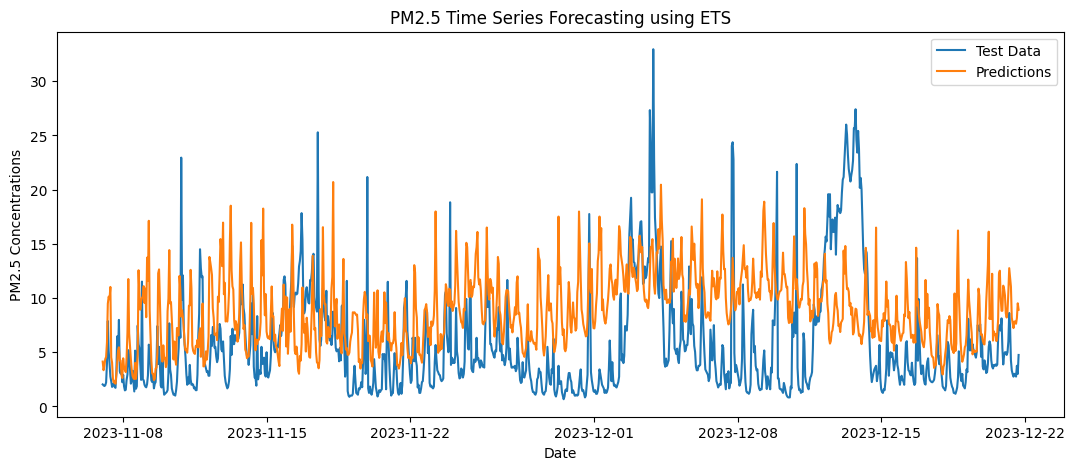

In [13]:
plt.figure(figsize=(13, 5))
#plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(predictions.index, predictions, label='Predictions')
plt.title('PM2.5 Time Series Forecasting using ETS')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentrations')
plt.legend()
plt.show()



In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'y_true' is the actual values and 'y_pred' is the predicted values
y_true = test_data  # Replace with your actual values
y_pred = predictions


# Calculate evaluation metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False) # Compute RMSE from MSE

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 5.0428987819022435
Mean Squared Error (MSE): 37.489880294451005
Root Mean Squared Error (RMSE): 6.122898030708253


In [11]:
from scipy.signal import periodogram
import numpy as np

fs = 1  # The sampling frequency. Set to 1 if your data is in days, months, etc.
frequencies, spectrum = periodogram(train_data, fs=fs)

# Find the index of the maximum power in the spectrum
max_power_index = np.argmax(spectrum)

# The corresponding frequency is the inverse of the seasonal period
seasonal_period = 1 / frequencies[max_power_index]
seasonal_period

1875.5